# Data Science Salaries 2023 💸
Salaries of Different Data Science Fields in the Data Science Domain.\
The aim of this notebook is to apply my personal knowledge of data science techniques.\
In particular, I'll apply the data science flow to the above mentioned dataset.\
Steps are:
* Data Wrangling
* Data Exploration and Visualization
* Model Building
* Model Evaluation
* Discussion

In [1]:
#dataset import and cleaning
import numpy as np
import pandas as pd

#data visualization and model scoring
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Model-building
##ML models
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
##DL models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers
import math

#Model evaluation
from sklearn.metrics import mean_absolute_percentage_error


## Data Wrangling and Exploration
This section is reserved for transforming row data in clean data, and\
for exploring what I am going to obtain after the wrangling process

### 1) Data Wrangling

In [2]:
#Creation of pandas Dataframe
input_file = '/kaggle/input/data-science-salaries-2023/ds_salaries.csv'
df = pd.read_csv(input_file)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [3]:
df.shape

(3755, 11)

#### Column values, formats and types checking

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


it tells there aren't NaN

In [5]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

"salary" and "salary_in_usd" represent the same information. Let's drop the first and also "salary_currency"

In [6]:
df.drop(["salary", "salary_currency"], axis=1, inplace=True)

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

columns are dropped

In [8]:
print("Work years\n")
print(df["work_year"].unique())

Work years

[2023 2022 2020 2021]


In [9]:
print("Experience Levels\n")
print(df["experience_level"].unique())


Experience Levels

['SE' 'MI' 'EN' 'EX']


In [10]:
print("Employment types\n")
print(df["employment_type"].unique())

Employment types

['FT' 'CT' 'FL' 'PT']


In [11]:
print("Job Titles\n")
print(f"Number of Categories: {df['job_title'].unique().shape[0]}\n")
print(df["job_title"].unique())

Job Titles

Number of Categories: 93

['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastr

**Now I'm going to make some approximations for reducing the high variety of job types.**\
**Basically, I can consider some categories as same job (not totally wrong in some cases).**\
**Then, in this way I can reduce the number of categories in order to make data analisys concise and**\
**further model easier to fit the data. REMEMBER that it is just an exercise.**

Here below the semplifications:

| New Category | Old Categories |
|:------------:| -------------- |
| AI Developer |AI Developer|
||AI Programmer|
||Applied Machine Learning Engineer|
||AI Scientist|
||Applied Data Scientist|
||Deep Learning Engineer|
||Deep Learning Researcher|
||Machine Learning Developer|
||Machine Learning Software Engineer|
||NLP Engineer|
||Machine Learning Research Engineer|
||Machine Learning Researcher|
||ML Engineer|
||Machine Learning Scientist|
||Machine Learning Engineer|
||Machine Learning Infrastructure Engineer|
||Applied Machine Learning Scientist|
||MLOps Engineer|
||Machine Learning Manager|
||Head of Machine Learning|
||Principal Machine Learning Engineer|
||Lead Machine Learning Engineer|
|Computer Vision Engineer|Computer Vision Software Engineer|
||3D Computer Vision Researcher|
||Computer Vision Engineer|
|Data Scientist|Data Scientist|
||Applied Scientist|
||Research Scientist|
||Data Science Consultant|
||Data Science Engineer|
||Product Data Scientist|
||Data Specialist|
||ETL Engineer|
||ETL Developer|
||Data Scientist Lead|
||Data Science Tech Lead|
||Data Science Lead|
||Lead Data Scientist|
||Director of Data Science|
||Head of Data Science|
||Data Science Manager|
||Principal Data Scientist|
||Staff Data Scientist|
|Data Analyst|Data Analyst|
||Analytics Engineer|
||Financial Data Analyst|
||Data Analytics Specialist|
||BI Data Analyst|
||Data Quality Analyst|
||Data Analytics Engineer|
||Business Data Analyst|
||BI Analyst|
||Data Analytics Consultant|
||Finance Data Analyst|
||Compliance Data Analyst|
||Power BI Developer|
||BI Developer|
||Insight Analyst|
||Data Operations Analyst|
||Marketing Data Analyst|
||Product Data Analyst|
||Business Intelligence Engineer|
||Data Analytics Lead|
||Data Analytics Manager|
||Staff Data Analyst|
||Lead Data Analyst|
||Principal Data Analyst|
|Data Engineer|Data Engineer|
||Data Modeler|
||BI Data Engineer|
||Cloud Data Engineer|
||Data Infrastructure Engineer|
||Azure Data Engineer|
||Data Strategist|
||Software Data Engineer|
||Marketing Data Engineer|
||Cloud Database Engineer|
||Big Data Engineer|
||Data DevOps Engineer|
||Data Management Specialist|
||Manager Data Management|
||Data Manager|
||Head of Data|
||Data Lead|
||Lead Data Engineer|
||Principal Data Engineer|
|Data Architect|Data Architect|
||Cloud Data Architect|
||Big Data Architect|
||Principal Data Architect|
|Autonomous Vehicle Technician|A. Vehicle Tech|

In [12]:
## Making Replacing
###############################################################
#"AI Developer"
ai_c = [ "AI Programmer",
         "Applied Machine Learning Engineer",
         "AI Scientist",
         "Applied Data Scientist",
         "Deep Learning Engineer",
         "Deep Learning Researcher",
         "Machine Learning Developer",
         "Machine Learning Software Engineer",
         "NLP Engineer",
         "Machine Learning Research Engineer",
         "Machine Learning Researcher",
         "ML Engineer",
         "Machine Learning Scientist",
         "Machine Learning Engineer",
         "Machine Learning Infrastructure Engineer",
         "Applied Machine Learning Scientist",
         "MLOps Engineer",
         "Machine Learning Manager",
         "Head of Machine Learning",
         "Principal Machine Learning Engineer",
         "Lead Machine Learning Engineer"]
df["job_title"].replace(ai_c, "AI Developer", inplace=True)
###############################################################
#"Computer Vision Engineer"
cv_c = [ "3D Computer Vision Researcher",
         "Computer Vision Engineer",
         "Computer Vision Software Engineer"]
df["job_title"].replace(cv_c, "Computer Vision Engineer", inplace=True)
###############################################################
#"Data Scientist"
ds_c = [ "Applied Scientist",
         "Research Scientist",
         "Data Science Consultant",
         "Data Science Engineer",
         "Product Data Scientist",
         "Data Specialist",
         "ETL Engineer",
         "ETL Developer",
         "Data Scientist Lead",
         "Data Science Tech Lead",
         "Data Science Lead",
         "Lead Data Scientist",
         "Director of Data Science",
         "Head of Data Science",
         "Data Science Manager",
         "Principal Data Scientist",
         "Staff Data Scientist"]
df["job_title"].replace(ds_c, "Data Scientist", inplace=True)
###############################################################
#"Data Analyst"
da_c = [ "Analytics Engineer",
         "Financial Data Analyst",
         "Data Analytics Specialist",
         "BI Data Analyst",
         "Data Quality Analyst",
         "Data Analytics Engineer",
         "Business Data Analyst",
         "BI Analyst",
         "Data Analytics Consultant",
         "Finance Data Analyst",
         "Compliance Data Analyst",
         "Power BI Developer",
         "BI Developer",
         "Insight Analyst",
         "Data Operations Analyst",
         "Marketing Data Analyst",
         "Product Data Analyst",
         "Business Intelligence Engineer",
         "Data Analytics Lead",
         "Data Analytics Manager",
         "Staff Data Analyst",
         "Lead Data Analyst",
       "Principal Data Analyst"]
df["job_title"].replace(da_c, "Data Analyst", inplace=True)
###############################################################
#"Data Engineer"
de_c = [ "Data Modeler",
         "BI Data Engineer",
         "Cloud Data Engineer",
         "Data Operations Engineer",
         "Data Infrastructure Engineer",
         "Azure Data Engineer",
         "Data Strategist",
         "Software Data Engineer",
         "Marketing Data Engineer",
         "Cloud Database Engineer",
         "Big Data Engineer",
         "Data DevOps Engineer",
         "Data Management Specialist",
         "Manager Data Management",
         "Data Manager",
         "Head of Data",
         "Data Lead",
         "Lead Data Engineer",
         "Principal Data Engineer"]
df["job_title"].replace(de_c, "Data Engineer", inplace=True)
###############################################################
#"Data Architect"
da_c = [ "Cloud Data Architect",
         "Big Data Architect",
         "Principal Data Architect"]
df["job_title"].replace(da_c, "Data Architect", inplace=True)
###############################################################
#"Lead Data Scientist"
hds_c = ["Data Scientist Lead",
         "Data Science Tech Lead",
         "Data Science Lead",
         "Lead Data Scientist",
         "Director of Data Science",
         "Head of Data Science"] 
df["job_title"].replace(hds_c, "Lead Data Scientist", inplace=True)
###############################################################
#"Autonomous Vehicle Technician"
df["job_title"].replace("Autonomous Vehicle Technician", "A. Vehicle Tech", inplace=True)

In [13]:
print(f"Number of Categories: {df['job_title'].unique().shape[0]}")
df["job_title"].unique()

Number of Categories: 8


array(['Data Scientist', 'AI Developer', 'Data Analyst', 'Data Engineer',
       'Research Engineer', 'Computer Vision Engineer', 'Data Architect',
       'A. Vehicle Tech'], dtype=object)

I obtained a more light job tytle set, which is easier for making stathistics

In [14]:
df.groupby("job_title")["salary_in_usd"].count()

job_title
A. Vehicle Tech                2
AI Developer                 466
Computer Vision Engineer      27
Data Analyst                 839
Data Architect               105
Data Engineer               1136
Data Scientist              1143
Research Engineer             37
Name: salary_in_usd, dtype: int64

Dataset is highly unbalanced, there are some orders of magnitude of difference between some category's sample number.\
It can be also seen graphically

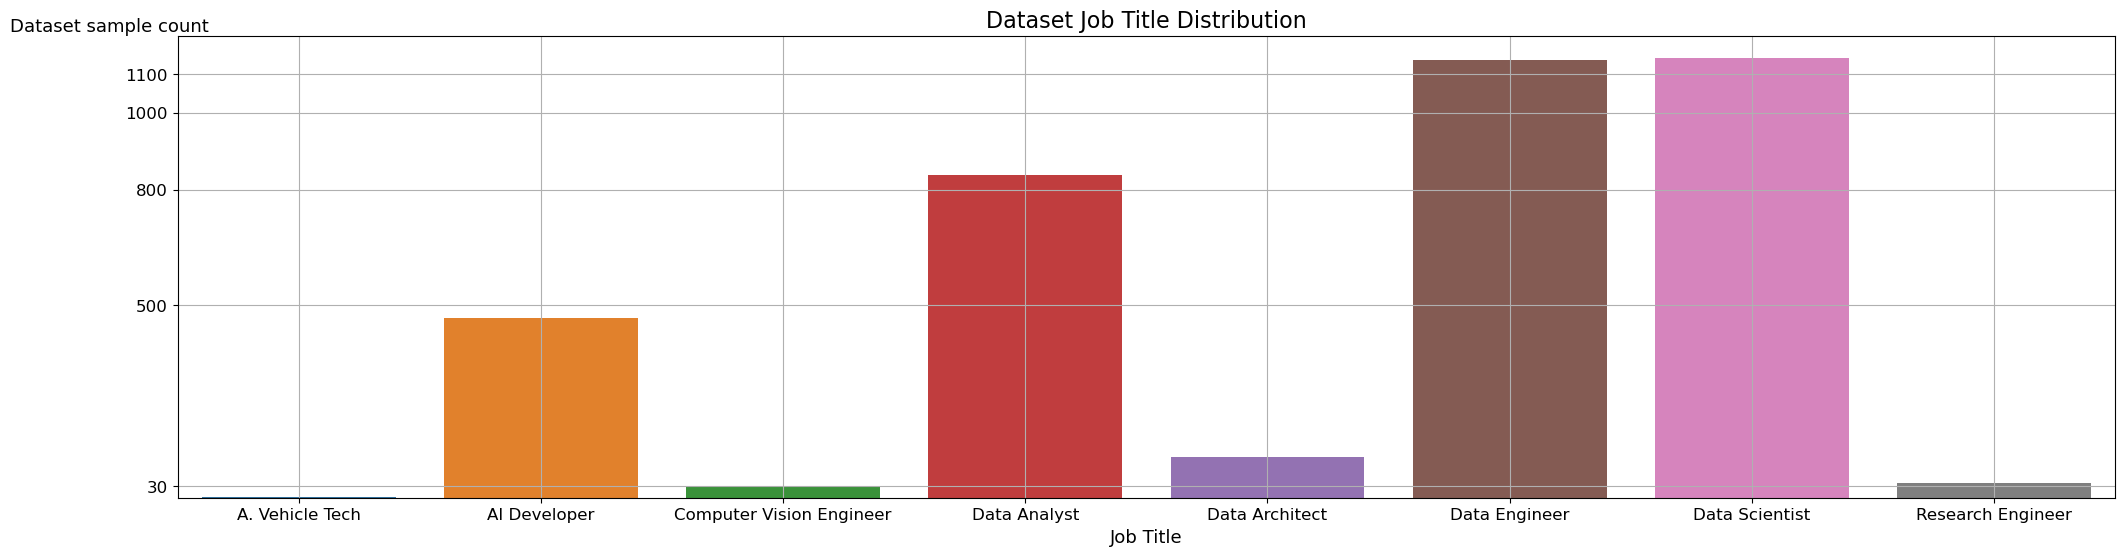

In [15]:
plt.figure(figsize=(25,6))
sns.barplot(x=df.groupby("job_title")["salary_in_usd"].count().index,
            y=df.groupby("job_title")["salary_in_usd"].count())
plt.xticks(fontsize=12)
plt.yticks([30, 500, 800, 1000, 1100],
           fontsize=12)
plt.xlabel("Job Title",
           fontsize=13)
plt.ylabel("Dataset sample count", 
           rotation=0, 
           loc="top",
           labelpad=-60,
           fontsize=13);
plt.title("Dataset Job Title Distribution",
          fontsize=16);
plt.grid()

In [16]:
print("Residencies\n")
print(df["employee_residence"].unique())

Residencies

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']


there are no type mistakes

In [17]:
print("Remote Ratios\n")
print(df["remote_ratio"].unique())

Remote Ratios

[100   0  50]


In [18]:
print("Company Locations\n")
print(df["company_location"].unique())

Company Locations

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']


In [19]:
print("Sizes\n")
print(df["company_size"].unique())

Sizes

['L' 'S' 'M']


In [20]:
df.shape

(3755, 9)

After all, dataset has always the same number of records as before cleaning process, but less columns.\
Now that it is clean, I can proceed through the mining process and visualization to get useful insights

### 2) Data Exploration

let's check any correlations and salaries distributions

Correlations in general can be observed for numerical variables, let's substitute \
"experience_level" categories with numbers (no get_dummies):\
EX = 4\
SE = 3\
MI = 2\
EN = 1

In [21]:
df["experience_level"].replace(["EN","MI","SE","EX"],[1, 2, 3, 4], inplace=True)

In [22]:
df[["salary_in_usd", "experience_level"]].corr()

,salary_in_usd,experience_level
salary_in_usd,1.000000,0.441668
experience_level,0.441668,1.000000


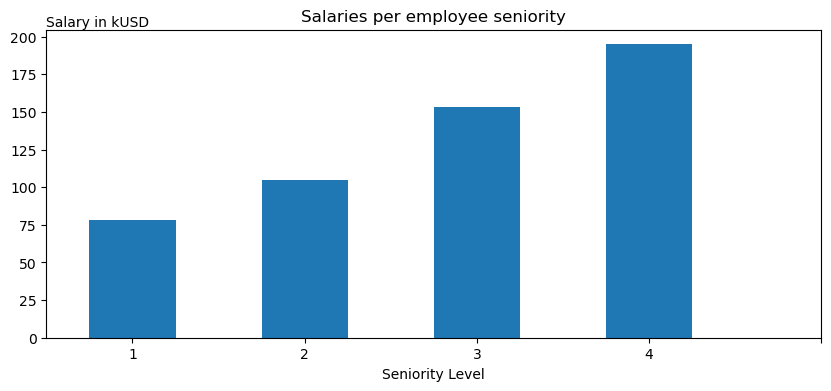

In [23]:
exp_df = df.groupby("experience_level")["salary_in_usd"].mean()/1000
plt.figure(figsize=(10,4))
exp_df.plot(kind="bar")
plt.xlabel("Seniority Level");
plt.ylabel("Salary in kUSD",
           loc="top",
           rotation=0,
           labelpad=-100);
plt.title("Salaries per employee seniority");
plt.xticks([0, 1, 2, 3, 4],
         rotation=0);

Let's check how many samples I have per job title

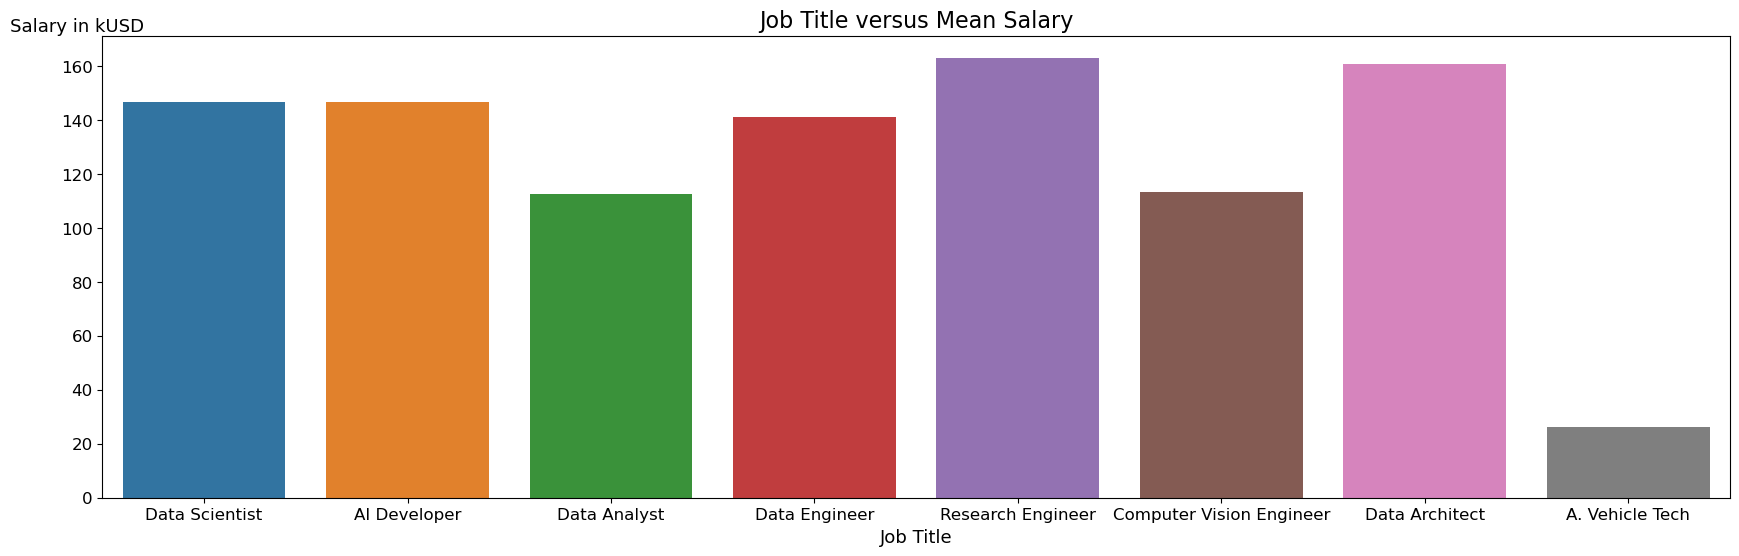

In [24]:
df_ext = df.loc[:, ["job_title", "salary_in_usd"]]
df_ext[["salary_in_usd"]] = df_ext[["salary_in_usd"]]/1000.0

plt.figure(figsize=(21,6))
sns.barplot(df_ext,
           x="job_title",
           y="salary_in_usd",
           errorbar=None)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Job Title",
           fontsize=13)
plt.ylabel("Salary in kUSD", 
           rotation=0, 
           loc="top",
           labelpad=-60,
           fontsize=13);
plt.title("Job Title versus Mean Salary",
          fontsize=16);


Considerations:\
Data show that Research engineers are better paid in average, followed by Data Architects.\
The worst paid category is the Autonomous Vehicle Technician.\
Data Scientists and AI developers are paid almost equally in average.

Now I am going to analyze the salary distribution

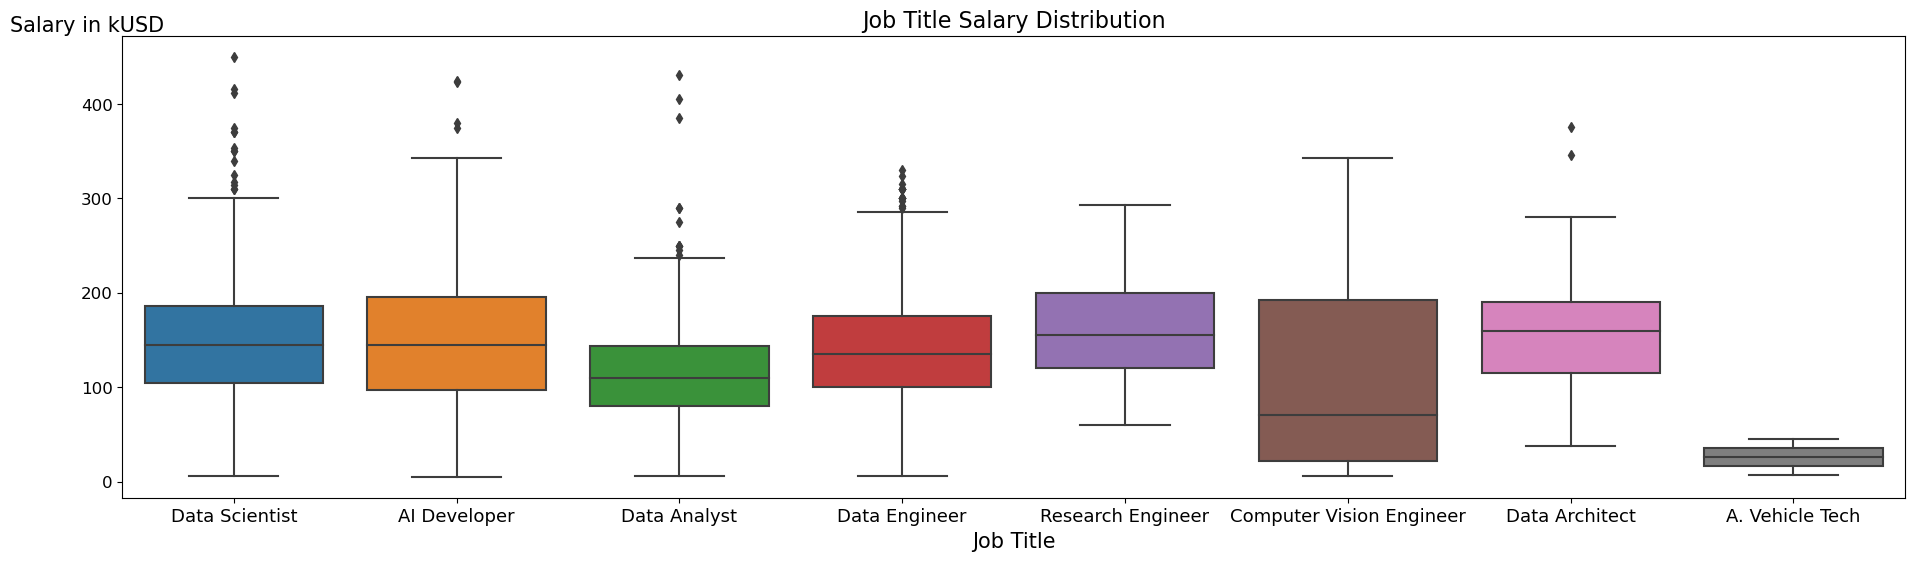

In [25]:
plt.figure(figsize=(23,6))
sns.boxplot(df_ext,
           x="job_title",
           y="salary_in_usd");
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel("Job Title",
           fontsize=15)
plt.ylabel("Salary in kUSD", 
           rotation=0, 
           loc="top",
           labelpad=-60,
           fontsize=15);
plt.title("Job Title Salary Distribution",
          fontsize=16);


I can dive more in detail. These categories are composed by different employee levels.\
A possibility can be observing single category exploding different seniority levels.

Text(0.5, 1.0, 'Experience Level effect on Data Scientist Salary')

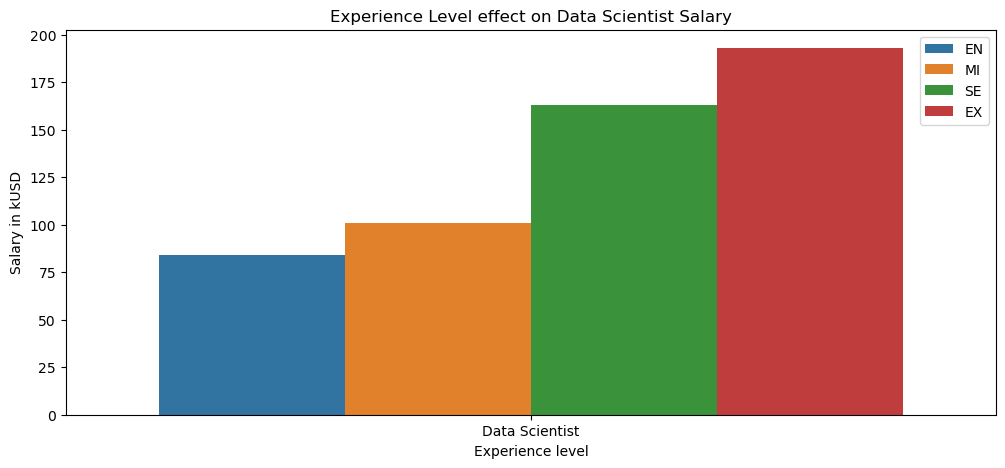

In [26]:
ds_df = df.loc[:,["job_title","experience_level", "salary_in_usd"]]
ds_df = ds_df[ds_df["job_title"] == "Data Scientist"]
ds_df["salary_in_usd"] = ds_df["salary_in_usd"]/1000.0
plt.figure(figsize=(12,5))
sns.barplot(ds_df,
            x="job_title",
            y="salary_in_usd",
            hue="experience_level",
            errorbar=None)
plt.legend(labels =["EN","MI", "SE", "EX"])
plt.xlabel("Experience level")
plt.ylabel("Salary in kUSD")
plt.title("Experience Level effect on Data Scientist Salary")

It is observable an interesting increasement related to the experience level.\
I can probably assume there are not outlier in this dataset (this assumption must be verified). 

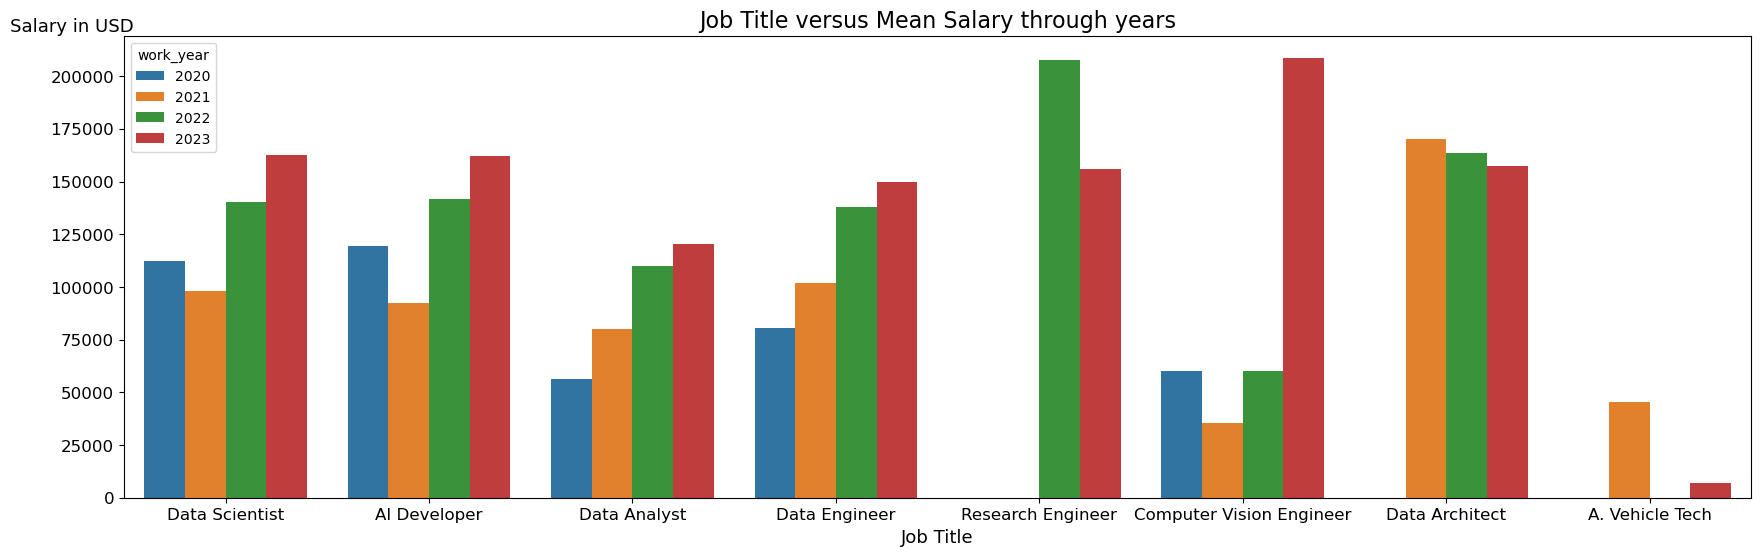

In [27]:
plt.figure(figsize=(21,6))
sns.barplot(df,
           x="job_title",
           y="salary_in_usd",
           errorbar=None,
           hue="work_year")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Job Title",
           fontsize=13)
plt.ylabel("Salary in USD", 
           rotation=0, 
           loc="top",
           labelpad=-60,
           fontsize=13);
plt.title("Job Title versus Mean Salary through years",
          fontsize=16);


It seems that in general salaries are increasing in the considered time range, except some categories

Let's evaluate Remote Ratio

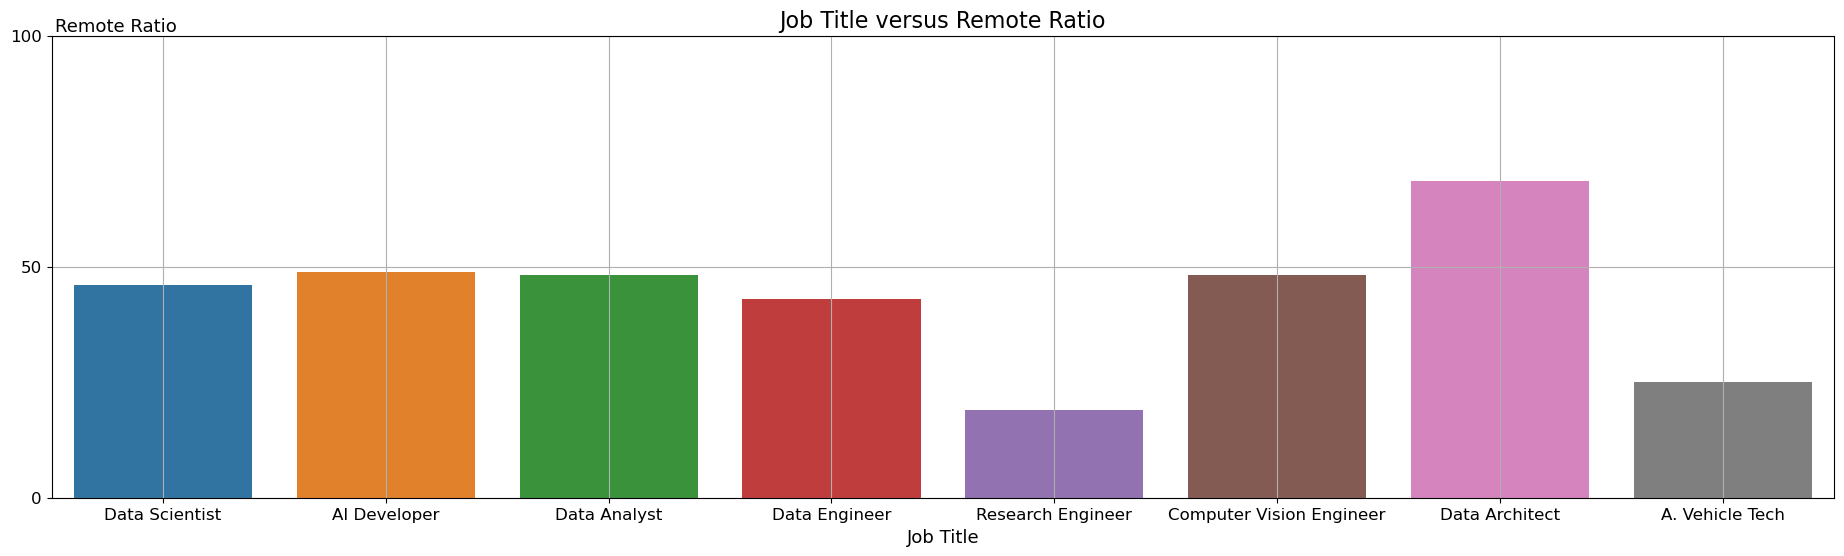

In [28]:
df_ext = df.loc[:, ["job_title", "remote_ratio"]]

plt.figure(figsize=(23,6))
sns.barplot(df_ext,
           x="job_title",
           y="remote_ratio",
           errorbar=None)
plt.xticks(fontsize=12)
plt.yticks([0, 50, 100],fontsize=12)
plt.xlabel("Job Title",
           fontsize=13)
plt.ylabel("Remote Ratio", 
           rotation=0, 
           loc="top",
           labelpad=-120,
           fontsize=13);
plt.title("Job Title versus Remote Ratio",
          fontsize=16);
plt.grid()

Considerations:\
By and large, on average all categories have roughly 50% of remote working ratio, but\
Research Engineers and Autonomous vehicle technicians. On the contrary, Data Architects show \
highest avarage on remote working ratio. That could've been related to their work activities.

## Model Building
This section is reserved for developing models for predictive analysis. \
I can consider different solutions:
* **Machine Learning:**
    1. Random Forest for Regression
    2. Multi Variate Regression
* **Deep Learning:**
    1. Deep Neural Netoworks
    2. Networks with NLP

#### 1) Dataset preparation and splitting

In [29]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

##### a) **data preparing**

In [30]:
X = df[["work_year", 
        "experience_level", 
        "employment_type", 
        "job_title", 
        "remote_ratio",
        "company_location", 
        "company_size"]]
Y = df["salary_in_usd"]

Xbk = X.loc[:,:]
Ybk = Y.loc[:]

##### b) **data augmentation**

In [31]:
concat_factor = 4
std = 0.01
X = Xbk.loc[:,:]
Y = Ybk.loc[:]

for time in range(concat_factor):
    X = pd.concat([X, Xbk])
    Y_tmp = Ybk.add(np.random.normal(0, std, Ybk.shape[0]))
    Y = pd.concat([Y, Ybk])

In [32]:
print(f"X new shape {X.shape}")
print(f"Y new shape {Y.shape}")

X new shape (18775, 7)
Y new shape (18775,)


##### c) **Train, Test Splitting**

In [33]:
## One-hot encoding
X = pd.get_dummies(X, drop_first=True)

#backup sets that will be used after
x_trainbk, x_testbk, y_trainbk, y_testbk = train_test_split(X, Y, 
                                                            test_size=0.02, 
                                                            random_state=0)
#get maximum compononent value
max_comp = X.shape[1]

#check shapes and axes
print(f"x dataset shape: {X.shape}")
print(f"x train shape: {x_trainbk.shape}")
print(f"x test shape: {x_testbk.shape}")

x dataset shape: (18775, 86)
x train shape: (18399, 86)
x test shape: (376, 86)


#### 2) Model Building and Evaluation
##### a) Random Forest

In [34]:
mape_array = []
for comp_val in range(1, max_comp+1):
    # recovery old values
    x_train, x_test, y_train, y_test = x_trainbk, x_testbk, y_trainbk, y_testbk
    #apply pca and transformation
    pca = PCA(n_components=comp_val)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)
    #declare regressor
    regr = RandomForestRegressor(max_depth=max_comp, random_state=30)
    regr.fit(x_train, y_train)
    #evaluation metrics
    y_hat = regr.predict(x_test)
    mape_array.append(mean_absolute_percentage_error(y_test, y_hat)*100)


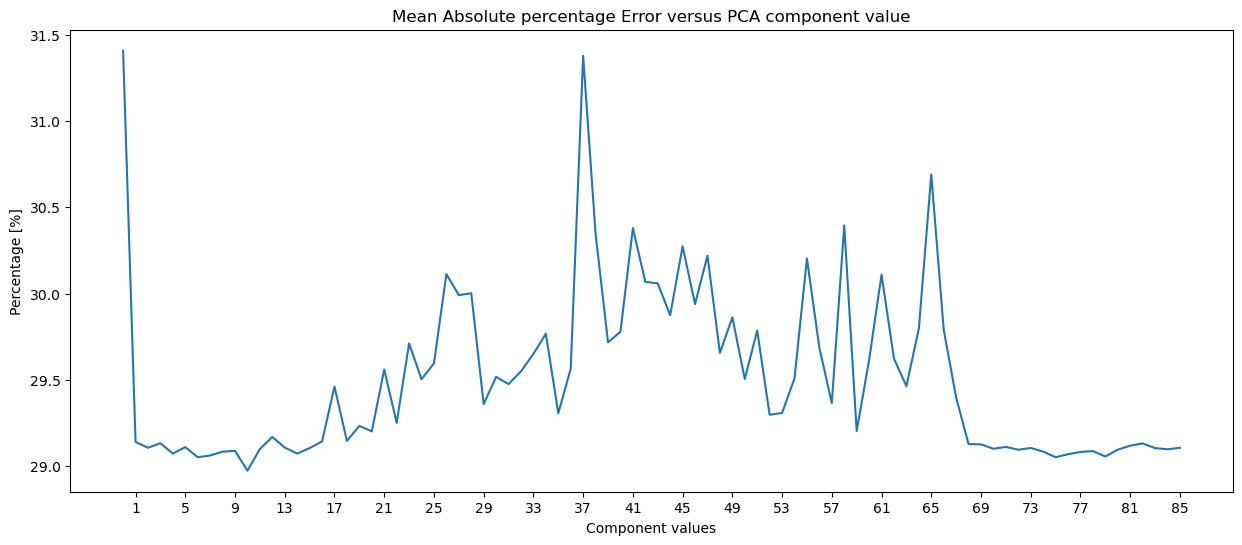

In [35]:
plt.figure(figsize=(15,6))
sns.lineplot(mape_array)
plt.xticks(np.arange(1,86,4))
plt.title("Mean Absolute percentage Error versus PCA component value")
plt.xlabel("Component values")
plt.ylabel("Percentage [%]");

In [36]:
print(f"Minimum Mape: {min(mape_array): <.2f}% with PCA best component value: {mape_array.index(min(mape_array))}")

Minimum Mape: 28.97% with PCA best component value: 10


It is not a pretty good result.\
Is it possible to do better?

##### b) Random Forest with XGBoost

In [37]:
mape_array = []
for comp_val in range(1, max_comp+1):
    # recovery old values
    x_train, x_test, y_train, y_test = x_trainbk, x_testbk, y_trainbk, y_testbk
    #apply pca and transformation
    pca = PCA(n_components=comp_val)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)
    #declare regressor
    xgb_r = xg.XGBRegressor(objective ='reg:squarederror',
                            eval_metric = "mape",
                            n_estimators = max_comp,
                            seed = 30)
    xgb_r.fit(x_train, y_train)
    #evaluation metrics
    y_hat = xgb_r.predict(x_test)
    mape_array.append(mean_absolute_percentage_error(y_test, y_hat)*100)

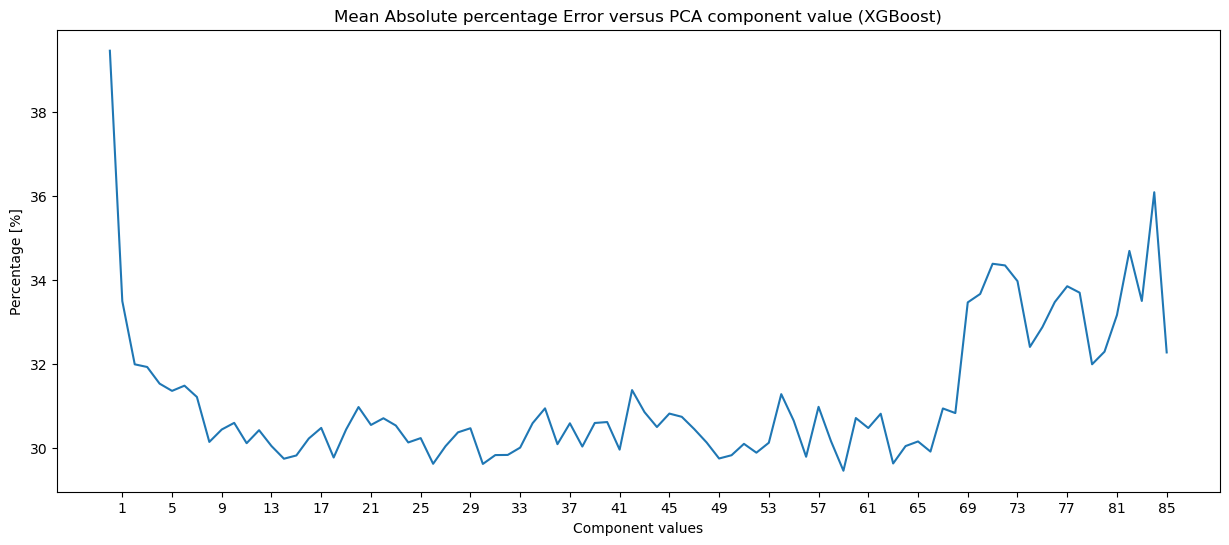

In [38]:
plt.figure(figsize=(15,6))
sns.lineplot(mape_array)
plt.xticks(np.arange(1,86,4))
plt.title("Mean Absolute percentage Error versus PCA component value (XGBoost)")
plt.xlabel("Component values")
plt.ylabel("Percentage [%]");

In [39]:
print(f"Minimum Mape: {min(mape_array): <.2f}% with PCA best component value: {mape_array.index(min(mape_array))}")

Minimum Mape: 29.45% with PCA best component value: 59


Worst than previous one, still not acceptable

##### c) Multi Variate Linear Regression

In [40]:
mape_array = []
r2_score = []
for comp_val in range(1, max_comp+1):
    # recovery old values
    x_train, x_test, y_train, y_test = x_trainbk, x_testbk, y_trainbk, y_testbk
    #apply pca and transformation
    pca = PCA(n_components=comp_val)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)
    #declare regressor
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    #evaluation metrics
    r2_score.append(reg.score(x_test, y_test))
    y_hat = reg.predict(x_test)
    mape_array.append(mean_absolute_percentage_error(y_test, y_hat)*100)

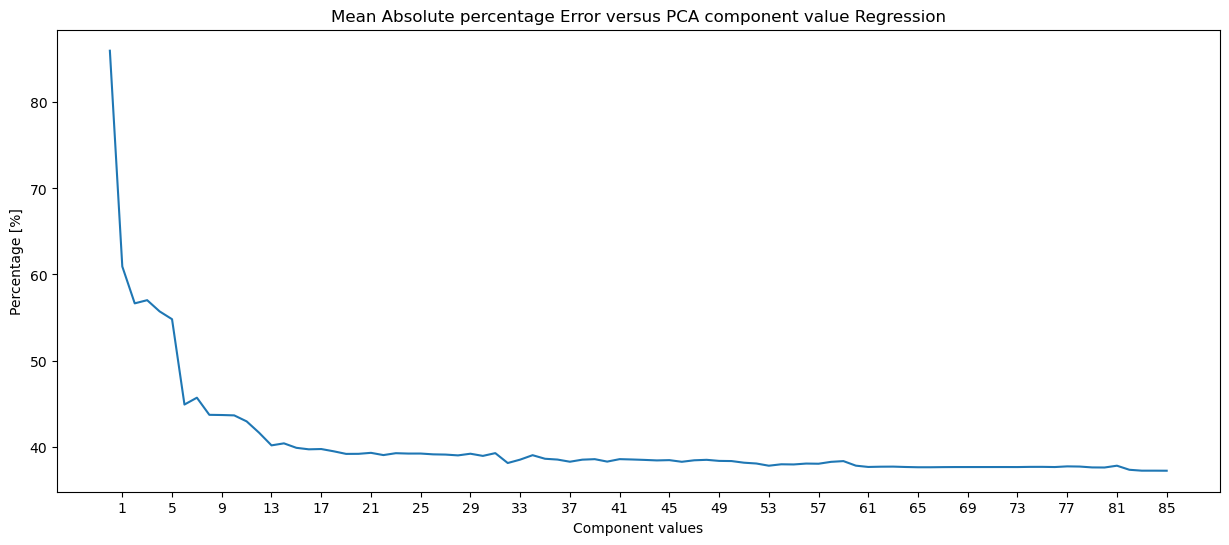

In [41]:
plt.figure(figsize=(15,6))
sns.lineplot(mape_array)
plt.xticks(np.arange(1,86,4))
plt.title("Mean Absolute percentage Error versus PCA component value Regression")
plt.xlabel("Component values")
plt.ylabel("Percentage [%]");

In [42]:
print(f"Minimum Mape: {min(mape_array): <.2f}% with PCA best component value: {mape_array.index(min(mape_array))}")

Minimum Mape: 37.19% with PCA best component value: 85


Not good yet

##### c.1) Multi Variate Ridge Regression

In [43]:
mape_array = []
r2_score = []
alpha_values = np.linspace(0.001, 0.5, 50)
for alpha in alpha_values:
    # recovery old values
    tmp_mape_arr = []
    for comp_val in range(1, max_comp+1):
        x_train, x_test, y_train, y_test = x_trainbk, x_testbk, y_trainbk, y_testbk
        #apply pca and transformation
        pca = PCA(n_components=comp_val)
        x_train = pca.fit_transform(x_train)
        x_test = pca.transform(x_test)
        #declare regressor
        reg = Ridge(alpha=alpha)
        reg.fit(x_train, y_train)
        #evaluation metrics
        r2_score.append(reg.score(x_test, y_test))
        y_hat = reg.predict(x_test)
        tmp_mape_arr.append(mean_absolute_percentage_error(y_test, y_hat)*100)
    mape_array.append(tmp_mape_arr)

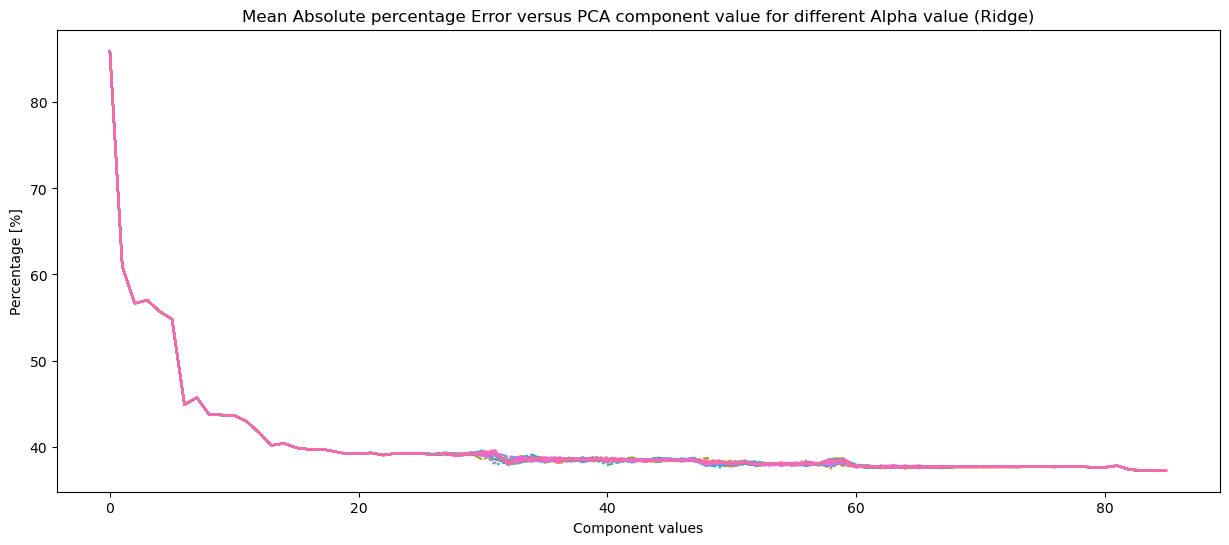

In [44]:
plt.figure(figsize=(15,6))
sns.lineplot(mape_array, legend=None);
plt.title("Mean Absolute percentage Error versus PCA component value for different Alpha value (Ridge)")
plt.xlabel("Component values")
plt.ylabel("Percentage [%]");

In [45]:
abs_min = min(min(mape_array))
for l_a in mape_array:
    if (abs_min in l_a):
        alpha_index = mape_array.index(l_a)
        comp_ind = l_a.index(abs_min)   
        
print(f"Absolute minimum: {abs_min : <.2f}%")        
print(f"Better PCA componet values: {comp_ind}")       
print(f"Better Alpha for Ridge Reg.: {alpha_values[alpha_index]}")

Absolute minimum: 37.19%
Better PCA componet values: 85
Better Alpha for Ridge Reg.: 0.001


All lines are pretty in agreement about that Regression is not suitable for this purpose

At this point it could be good idea to observe the output distribution.\
It could've needed a regularization o scaling process. let's observe data.

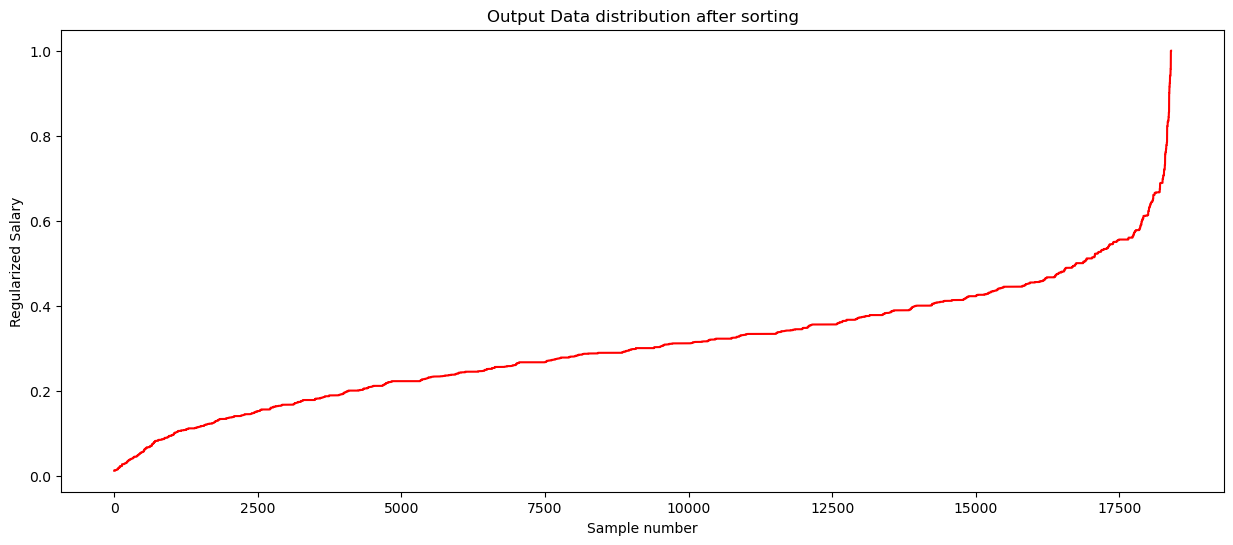

In [46]:
plt.figure(figsize=(15,6))
sns.lineplot(np.sort(np.array(y_trainbk)/Y.max()),
             color="r")
plt.title("Output Data distribution after sorting")
plt.xlabel("Sample number")
plt.ylabel("Regularized Salary");

Pretty non linear. It confirms that Linear or Ridge Regression cannot easily fit these data.\
Now I must observe test set.

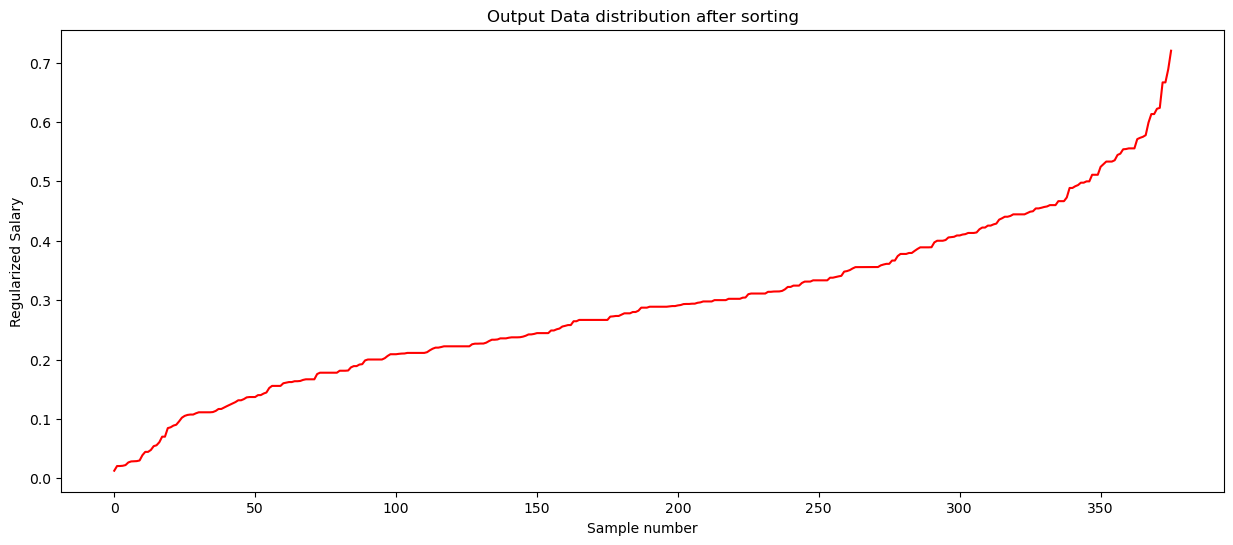

In [47]:
plt.figure(figsize=(15,6))
sns.lineplot(np.sort(np.array(y_testbk)/Y.max()),
             color="r")
plt.title("Output Data distribution after sorting")
plt.xlabel("Sample number")
plt.ylabel("Regularized Salary");

Pretty Similar shape.\
As last shot before diving through deep learning world, I have to try some polynomial fitting.\
It looks like odd degree polynomial, I'll check it out

In [37]:
#Regularization by greatest Y value

y_train = y_trainbk/Y.max()
y_test = y_testbk/Y.max()

##### C.2) Polynomial Regression


(Results not included because of extremely high RAM allocaton which is out of my current budget)

In [ ]:
p_order = np.arange(3,5,2)
mape_array = []
for degree in p_order:
    poly_feature = PolynomialFeatures(degree=degree)
    p_x_train = poly_feature.fit_transform(x_trainbk)
    p_x_test = poly_feature.fit_transform(x_testbk)
    lreg = LinearRegression()
    lreg.fit(p_x_train, y_train)
    y_hat = lreg.predict(p_x_test)
    mape_array.append(mean_absolute_percentage_error(y_test, y_hat)*100)

In [ ]:
print(mape_array)

Undeniably shameful results, let's pack ML trials in.

##### D) Deep Learning


In [36]:
model = tf.keras.Sequential([ 
            tf.keras.layers.Dense(16, 
                                  activation='relu', 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.001),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(32, 
                                  activation='sigmoid', 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.01),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(64, 
                                  activation='sigmoid', 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.01),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(32, 
                                  activation='tanh', 
                                  kernel_initializer='he_normal',
                                  bias_regularizer=tf.keras.regularizers.l2(0.001),
                                  kernel_regularizer=tf.keras.regularizers.l2(0.001)),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(1, 
                                  activation='relu', 
                                  kernel_initializer='he_normal')])

In [38]:
flag = True
class StopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if ( logs.get('val_loss') is not None and \
             logs.get('val_loss') < 28.5): 
            print("\nReached wanted accuracy so cancelling training!")
            self.model.stop_training = True
            global flag 
            flag = False
            
class PrintCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 200 == 0):
            print(f"Epoch: {epoch: <6}")
            print(f"{'Valid_loss: ' :<6}{logs.get('val_loss') : <7.4f}")
            print(f"{'Train_loss: ' :<6}{logs.get('loss') : <7.4f}")
            
sp_cb = StopCallback()
check_cb = PrintCallback()

In [39]:
epochs_a = [1000, 1000, 1000, 3000, 3000, 1000]
lr_a =     [1e-3, 1e-4, 5e-5, 1e-5, 5e-6, 1e-6]
history = []
for epochs, lr in zip(epochs_a, lr_a):
    print("###############")
    print(f"Epochs : {epochs}")
    print(f"L.Rate : {lr}")
    print("###############")
    if (flag == True):
        model.compile(loss='mape',
                      optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                      metrics=['mae']) 
        history.append(model.fit(x_trainbk, 
                                 y_train, 
                                 epochs=epochs,
                                 batch_size=512,
                                 validation_data=(x_testbk, y_test),
                                 callbacks=[sp_cb, check_cb],
                                 verbose=0))
    else:
        pass

###############
Epochs : 1000
L.Rate : 0.001
###############
Epoch: 0     
Valid_loss: 101.9418
Train_loss: 109.8897
Epoch: 200   
Valid_loss: 284.6798
Train_loss: 28.2538
Epoch: 400   
Valid_loss: 168.6168
Train_loss: 26.6905
Epoch: 600   
Valid_loss: 208.5986
Train_loss: 25.8347
Epoch: 800   
Valid_loss: 156.9208
Train_loss: 25.5017
###############
Epochs : 1000
L.Rate : 0.0001
###############
Epoch: 0     
Valid_loss: 220.1341
Train_loss: 24.4039
Epoch: 200   
Valid_loss: 105.9049
Train_loss: 23.9894
Epoch: 400   
Valid_loss: 142.3191
Train_loss: 23.9283
Epoch: 600   
Valid_loss: 76.3344
Train_loss: 23.7603
Epoch: 800   
Valid_loss: 69.9133
Train_loss: 23.7038
###############
Epochs : 1000
L.Rate : 5e-05
###############
Epoch: 0     
Valid_loss: 50.8828
Train_loss: 23.7369
Epoch: 200   
Valid_loss: 85.9520
Train_loss: 23.4400
Epoch: 400   
Valid_loss: 118.3528
Train_loss: 23.4005
Epoch: 600   
Valid_loss: 62.0939
Train_loss: 23.3933
Epoch: 800   
Valid_loss: 50.2092
Train_loss: 23.3

In [40]:
model.evaluate(x_testbk, y_test, verbose=1)

12/12 [==============================] - 0s 3ms/step - loss: 28.5255 - mae: 0.0788


[28.52552032470703, 0.07879257947206497]

Plot the last iteration just for semplicity

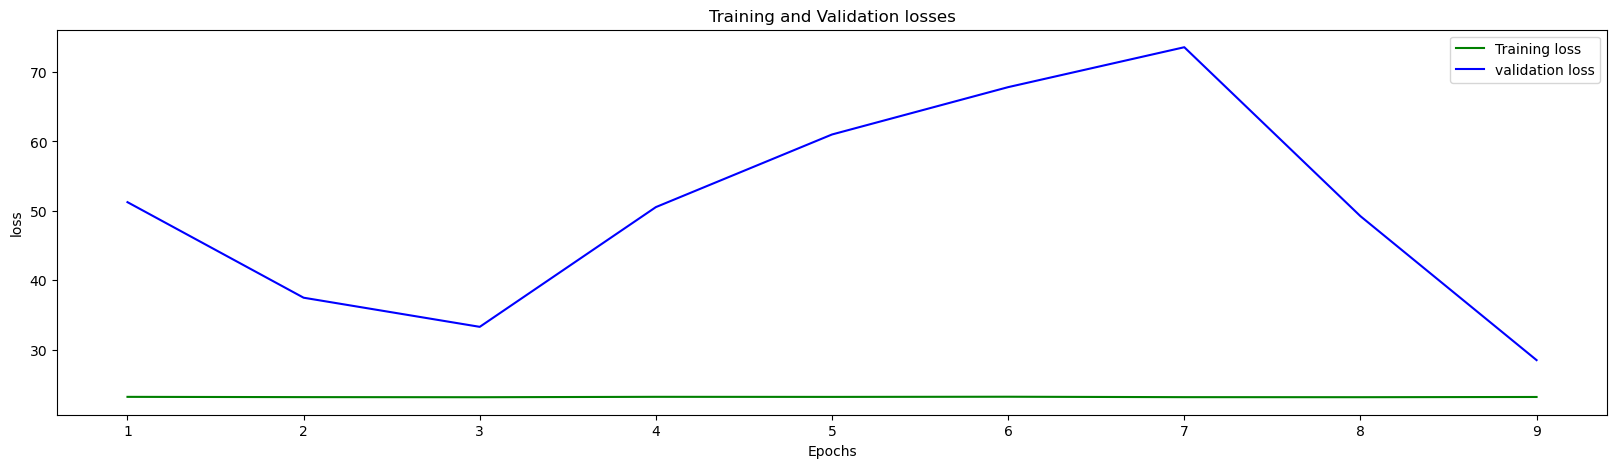

In [48]:
epoch_range = np.arange(1, history[-1].epoch[-1]+2)
train_loss = history[-1].history['loss']
val_loss = history[-1].history['val_loss']

plt.figure(figsize=(20,5))
plt.plot(epoch_range, train_loss, 'g', label='Training loss')
plt.plot(epoch_range, val_loss, 'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1392      
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

#### Conclusion

Reached accuracy 28.52% required a deep neural network due to the incredibly non linear output distribution.\
As showed below, network is pretty light with 6,449 trainable parameters and everithing could've been worse.\
In general, I hade changed the network about 30 times and I had run the entire training about 50 times but after all\
target accuracy is reached. This model is able to foresee salaries with not bad at all accuracy, but can be surely improved.\
Possible improvements:
* **Convolutional Layers**
* **Transfer Learning and fine-tuning**
* **Branches Model**
* **Natural Language Processing**

Experimental example: Instead of using dummy variables, a possibility could've been to create sentences using the data strings as they are before transofrmation, and after\
a Deep neural netowrk based on Tokenization, Word Embedding and Long-Short Term Memory (LSTM) cells could've been used. In this way, the problem is changed on\
different concept because substantially it becomes a Natural Language Processing system, which interprets data as an approximations of human language.